<a href="https://colab.research.google.com/github/amirafshari/implementation/blob/main/autoencoder/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# MNIST

In [170]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [171]:
transform = transforms.ToTensor() # it must be tensor
mnist = torchvision.datasets.MNIST(root='./content', download=True, transform=transform)

In [172]:
mnist = DataLoader(mnist, batch_size=4, shuffle=True)

In [180]:
sample_img_batch, sample_label_batch = next(iter(mnist))

In [181]:
sample_img_batch[0].squeeze().shape

torch.Size([28, 28])

tensor(7)

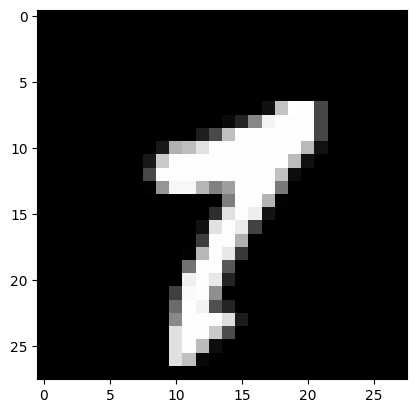

In [182]:
plt.imshow(sample_img_batch[0].squeeze(), cmap='gray')
sample_label_batch[0]

# Simple AutoEncoder

In [2]:
encoding_dim = 32
input_img = torch.randn(784)

encoded = nn.Linear(784, encoding_dim)
decoded = nn.Linear(encoding_dim, 784)

encoded(input_img)

In [143]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Linear(input_dim, encoding_dim)
        self.decoder = nn.Linear(encoding_dim, input_dim)

    def forward(self, x):
        x = self.flatten(x)
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [183]:
model = Autoencoder(784,32)
output = model(sample_img_batch)
loss = F.mse_loss(output, input_img)

<ipython-input-183-f8712cfbd457>:3: UserWarning: Using a target size (torch.Size([784])) that is different to the input size (torch.Size([4, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, input_img)


## Train

In [186]:
import torch.optim as optim

In [211]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model = Autoencoder(784, 32)
model.train()


epoch = 50

for i in range(epoch):
  for images, _ in mnist:

    optimizer.zero_grad()

    output = model(images)

    labels = torch.reshape(images, shape=(4, 784))

    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()
  print(i, loss)

0 tensor(0.1606, grad_fn=<MseLossBackward0>)
1 tensor(0.1321, grad_fn=<MseLossBackward0>)
2 tensor(0.1229, grad_fn=<MseLossBackward0>)
3 tensor(0.2024, grad_fn=<MseLossBackward0>)
4 tensor(0.1674, grad_fn=<MseLossBackward0>)
5 tensor(0.1640, grad_fn=<MseLossBackward0>)
6 tensor(0.1461, grad_fn=<MseLossBackward0>)
7 tensor(0.1704, grad_fn=<MseLossBackward0>)
8 tensor(0.1684, grad_fn=<MseLossBackward0>)
9 tensor(0.1380, grad_fn=<MseLossBackward0>)
10 tensor(0.1275, grad_fn=<MseLossBackward0>)
11 tensor(0.1194, grad_fn=<MseLossBackward0>)
12 tensor(0.1502, grad_fn=<MseLossBackward0>)
13 tensor(0.1451, grad_fn=<MseLossBackward0>)
14 tensor(0.1288, grad_fn=<MseLossBackward0>)
15 tensor(0.1269, grad_fn=<MseLossBackward0>)
16 tensor(0.1358, grad_fn=<MseLossBackward0>)
17 tensor(0.1176, grad_fn=<MseLossBackward0>)
18 tensor(0.1317, grad_fn=<MseLossBackward0>)
19 tensor(0.1375, grad_fn=<MseLossBackward0>)
20 tensor(0.1452, grad_fn=<MseLossBackward0>)
21 tensor(0.1889, grad_fn=<MseLossBackward0>

## Inference

In [212]:
model.eval()

AutoEncoder(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder): Linear(in_features=784, out_features=32, bias=True)
  (decoder): Linear(in_features=32, out_features=784, bias=True)
)

In [213]:
output = model(sample_img_batch[0])

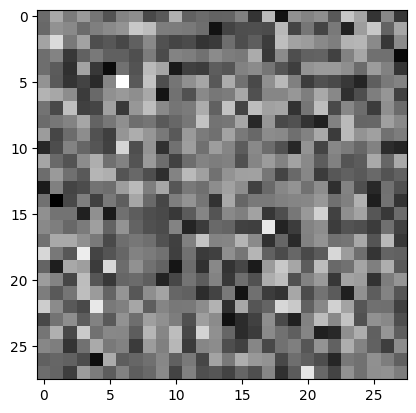

In [214]:
output = torch.reshape(output, shape=(28,28))
output = output.detach()
plt.imshow(output, cmap='gray')

# Deep autoencoder

In [215]:
class DeepAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.flatten = nn.Flatten()

        self.encoder1 = nn.Linear(input_dim, 128)
        self.encoder2 = nn.Linear(128, 64)
        self.encoder3 = nn.Linear(64, 32)

        self.decoder1 = nn.Linear(32, 64)
        self.decoder2 = nn.Linear(64, 128)
        self.decoder3 = nn.Linear(128, input_dim)

    def forward(self, x):
        x = self.flatten(x)
        x = self.encoder1(x)
        x = self.encoder2(x)
        x = self.encoder3(x)
        x = self.decoder1(x)
        x = self.decoder2(x)
        x = self.decoder3(x)

        return x

# Train

In [218]:
criterion = nn.BCELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.01)

model = DeepAutoencoder(784)
model.train()


epoch = 50

for i in range(epoch):
  for images, _ in mnist:

    optimizer.zero_grad()

    output = model(images)

    labels = torch.reshape(images, shape=(4, 784))

    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()
  print(i, loss)

RuntimeError: ignored

In [222]:
labels[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 